# CAPSTONE PROJECT
## The Battle of the Neighborhoods (Week 2)

### Finding a place for new a chinese restaurant
_Valentin Romanelli_



### __Introduction__
The history of Chinese Americans or the history of ethnic Chinese in the United States includes three major waves of Chinese immigration since the 19th century, and they have been discriminated in many ways and even they had laws against the chinese, for example about the entry into the country. According of the 2010 United States Census, there were more than 3.3 million Chinese in the United States, which means about 1% of the total population and the biggest community outside  Asia, and this number is increasing. They have neighborhoods in many cities of USA, and New York City is not an excepction. 

In this capstone project i used differents types of data sources to get insights about the facts to consider to open a new chinese restaurant, considering that the chinese food is very appreciated worlwide, and even with the current panic about the diseases related with China this trend doesnt seem to change in the future. 

### __Methodology__

-The basic cata will be collected from https://cocl.us/new_york_dataset and then cleaned and processed into a pandas dataframe.

-The FourSquare will be used to locate all venues and then filtered by chinese restaurants. 

-I will explore this data to get preliminary conclusions. 

-With the data about population and the rent prices i will have a more complete view about the city and its boroughs and neighborhoods. 

-Using all this information i will conclude about the best place to open a chinese restuarant. 


### __Data__

To answer the question i used different data sources. The first step was obtaining data about the boroughs, neighborhoods and coordinates of the city, which is available in the data source: https://cocl.us/new_york_dataset.

The data about the chinese restaurants will be obtained from the FourSquare API and requested with Python libraries.

We also need information about the population of each borough and neighborhood, and i found that it is available in:

https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Neighborhood-Tabulatio/swpk-hqdp

To get aditional data from a non traditional source i will also use the data from Airbnb with the historic data of 2019, which is available in:

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

#2
### __Problem Statement__
1.	What is / are the best location(s) for Italian cuisine in New York City?
2.	In what Neighborhood and/or borough should I open an Italian restaurant to have the best chance of being successful?
3.	Where would I go in New York City to have the best Italian food?

First i load the Libraries i will need to solve the questions i asked. 

In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Done!')

Solving environment: \ 

Variables from my Foursquare account:

In [ ]:
CLIENT_ID = 'IJZZS5EFHVYUNOW2CYSIVGPEP5ZPT00SKTHRNEPMWFXBVCFN' # Foursquare ID
CLIENT_SECRET = 'RBUFGZEIEMZ3R4EH3E0GYBFG15GA34REWAPO31KS2TM3YCOH' # Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

I create and object with the data i obtained, as we have done on a previous laboratory of the course. Then i see the firs rows to verify that is that i want:

In [ ]:
ny_data = get_new_york_data()
ny_data.head(10)

I see the dimensions of the dataframe:

In [5]:
ny_data.shape

(306, 4)

I start the exploratory analysis looking at the number of neighborhoods in each borough, to get a big picture of the structure of the city.

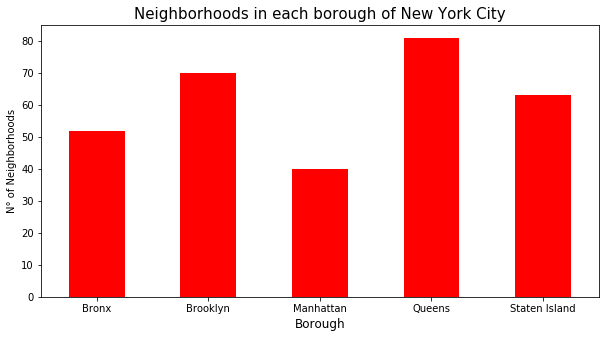

In [6]:
clr = "red"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods in each borough of New York City', fontsize = 15)
plt.xlabel('Borough', fontsize =12)
plt.ylabel('N° of Neighborhoods',fontsize = 10)
plt.xticks(rotation = 'horizontal')
plt.show()

As we can see in the image, Manhattan is the borough with less number of neighborhoods. 

As the main purpose oh this study is reserarching about the chinese restaurants in New York, in the next visualizations we can see how many of them are in the boroughs and neighborhoods.

In [7]:

#After this i obtain a neighborhood list that contains chinese resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
chr_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    chinese_resturants=venues[venues['Category']=='Chinese Restaurant']   
    print('(',count,'/',len(ny_data),')','Chinese Resturants in '+Neighborhood+', '+Borough+':'+str(len(chinese_resturants)))
    print(row)
    for restaurant_detail in chinese_resturants.values.tolist():
        id, name , category=restaurant_detail
        chr_ny = chr_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Chinese Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Chinese Resturants in Co-op City, Bronx:1
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Chinese Resturants in Eastchester, Bronx:1
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Chinese Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Chinese Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Chinese Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Chinese Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Chinese Resturants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Chinese Resturants in Norwood, Bronx:1
['Bronx', '

KeyError: 'groups'

In [8]:
chr_ny.head(10)

,Borough,Neighborhood,ID,Name
0,Bronx,Co-op City,4c9d5f2654c8a1cd2e71834b,Guang Hui Chinese Restaurant
1,Bronx,Eastchester,4dabc3dc93a04642f09ccabd,Xing Lung Chinese Restaurant
2,Bronx,Norwood,4e41d2c4b61ca5ba3b1f9c6b,Ming Liang Kitchen
3,Bronx,Pelham Parkway,4b9d6b45f964a52078ab36e3,Mr. Q's Chinese Restaurant
4,Bronx,Bedford Park,4e4d0387bd413c4cc66dfd72,Hung Hing Chinese Restaurant
5,Bronx,Bedford Park,4cba4a550180721ebb739961,Rose Flower Chinese
6,Bronx,Bedford Park,4c87c9930dcb8cfa68e63d68,New Xing Wang Chinese Restaurant
7,Bronx,Morris Heights,4c0315d89a7920a1f67ccf79,Xing Sheng
8,Bronx,Fordham,4cf30a837e93f04d366a5669,China Wok II
9,Bronx,West Farms,4cd0d4d77b6854810401c4f8,Food Hai


I obtain the number of rows and columns and after this some information about the dataframe:

In [9]:
chr_ny.shape

(124, 4)

In [10]:
chr_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
Borough         124 non-null object
Neighborhood    124 non-null object
ID              124 non-null object
Name            124 non-null object
dtypes: object(4)
memory usage: 4.0+ KB


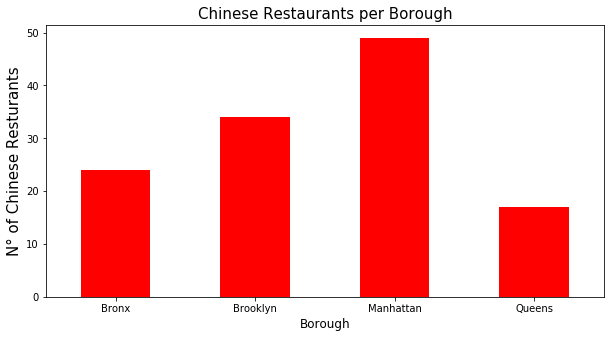

In [11]:
chr_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Chinese Restaurants per Borough', fontsize = 15)
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('N° of Chinese Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

As we can see in the barplot, Manhattan is the borough with most chinese restaurants in New York. Before we saw that is the borough with less neighborhoods. A possible explanation is the fact that is an island with a high density of population index, but we can make another analysis to discover new facts that can explain the high number of chinese restaurants in comparisson with another boroughs.  

In the next cell we can see the detail of chinese restaurants by borough in a sorted list: 

In [16]:
chr_nygb=chr_ny.groupby('Borough')['ID'].count()
chr_nygb
df_chr_ngyb=chr_nygb.reset_index().sort_values("ID", ascending=False)
df_chr_ngyb.head(10)


,Borough,ID
2,Manhattan,49
1,Brooklyn,34
0,Bronx,24
3,Queens,17


I obtain the same report but with the proportion of restaurants in each borough, where we can see that almost 40% the restaurants of the city are in Manhattan. 

In [17]:
chr_ny['Borough'].value_counts(normalize = True)

Manhattan    0.395161
Brooklyn     0.274194
Bronx        0.193548
Queens       0.137097
Name: Borough, dtype: float64

I group the chinese restaurants but in this case by neighborhood (instead of by borough), visualizing the neigborhoods with most restaurants. 

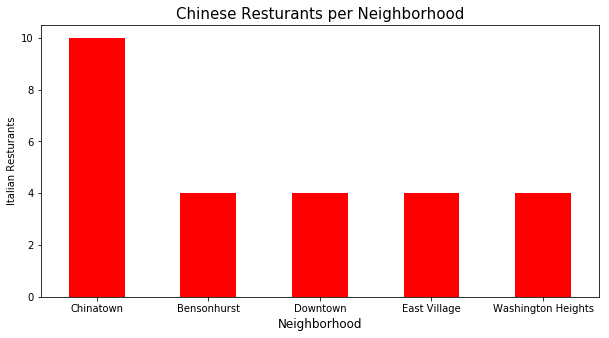

In [12]:
Nneigh= 5
chr_ny.groupby('Neighborhood')['ID'].count().nlargest(Nneigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Chinese Resturants per Neighborhood', fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 12)
plt.ylabel('Italian Resturants', fontsize=10)
plt.xticks(rotation = 'horizontal')
plt.show()

#1
When we see the detail of the neighborhoods with more chinese restaurants we find new explanations of the reason of the first position of Manhattan in this ranking. As we could expect, Chinatown is largely the neighborhood with most chinese restaurants, more than the double of the number of the second neighborhood.

#1
As i have done before with the boroughs, i obtain numeric reports of the number of restaurants by neighborhood and the proportions:

In [20]:
chr_nygn=chr_ny.groupby('Neighborhood')['ID'].count()
chr_nygn
df_chr_ngyn=chr_nygn.reset_index().sort_values("ID", ascending=False)
df_chr_ngyn.head(10)

,Neighborhood,ID
10,Chinatown,10
21,East Village,4
3,Bensonhurst,4
18,Downtown,4
64,Washington Heights,4
31,Greenwich Village,3
2,Bedford Park,3
39,Little Italy,3
38,Lincoln Square,3
24,Elmhurst,3


In [22]:
chr_ny['Neighborhood'].value_counts(normalize = True)

Chinatown             0.080645
East Village          0.032258
Downtown              0.032258
Washington Heights    0.032258
Bensonhurst           0.032258
Greenwich Village     0.024194
Lincoln Square        0.024194
Elmhurst              0.024194
Bedford Park          0.024194
Little Italy          0.024194
South Side            0.016129
Mott Haven            0.016129
Windsor Terrace       0.016129
Brooklyn Heights      0.016129
Manhattanville        0.016129
Soundview             0.016129
Concourse             0.016129
Lower East Side       0.016129
Midtown               0.016129
Murray Hill           0.016129
Parkchester           0.016129
Pelham Gardens        0.016129
West Village          0.016129
North Side            0.016129
Fort Hamilton         0.016129
Rego Park             0.016129
Flushing              0.016129
Clinton Hill          0.016129
Sunnyside             0.016129
East New York         0.016129
                        ...   
Cypress Hills         0.008065
Pelham B

As we can see in the reports above, there are ten chinese restaurants in Chinatown, which represents less than 10% of the total restaurants in NYC but more than the 20% of the number of restaurants in Manhattan. 

I add a new dataset with the information about the population of NYC by neighborhood.

The data was obtained from:
https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Neighborhood-Tabulatio/swpk-hqdp

In [34]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2b25f4fc3a6149d59a545d01580b611e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0kH8XlS58E53cs5KbgxhQEf3Bc31VpprRQoPVsmJgZpM',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_2b25f4fc3a6149d59a545d01580b611e.get_object(Bucket='thebattleofneigbourhoodsvrprueba-donotdelete-pr-vslq8oz8sr8uym',Key='New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
df_pn = pd.read_csv(body)
df_pn.head()



,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309


First i obtain the detail of the total population by year. As we can see below, there are two years considered in this dataset, and the total population increased just a little in this period.

In [35]:
df_pny=df_pn.groupby('Year')['Population'].agg("sum")
df_pny

Year
2000    8008278
2010    8175133
Name: Population, dtype: int64

I obtain a new dataset with only the data from 201 to obtained a more accurate idea about the current population distribution in the city. 

In [38]:
df_pn2=df_pn[df_pn['Year']>2000]
df_pn2.head()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,5,BX06,Belmont,27378
199,Bronx,2010,5,BX07,Bronxdale,35538


With the filtered data i obtain the population by borough.

In [39]:
df_pnb=df_pn2.groupby('Borough')['Population'].agg("sum")
df_pnb

Borough
Bronx            1385108
Brooklyn         2504700
Manhattan        1585873
Queens           2230722
Staten Island     468730
Name: Population, dtype: int64

As we can see above, Manhattan is almost the borough with less population. We can do the same analysis with neigborhoods (column name "NTA Name" in this dataset).  

In [60]:
df_pnn=df_pn2.groupby('NTA Name')['Population'].agg("sum")
df_pnno=df_pn2.reset_index().sort_values("Population", ascending=False)

df_pnno.head(10)
#df_pnno.head(70)

,index,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
96,291,Manhattan,2010,61,MN12,Upper West Side,132378
139,334,Queens,2010,81,QN28,Jackson Heights,108152
82,277,Brooklyn,2010,47,BK88,Borough Park,106357
58,253,Brooklyn,2010,47,BK42,Flatbush,105804
66,261,Brooklyn,2010,47,BK61,Crown Heights North,103169
79,274,Brooklyn,2010,47,BK82,East New York,91958
46,241,Brooklyn,2010,47,BK28,Bensonhurst West,88727
140,335,Queens,2010,81,QN29,Elmhurst,88427
115,310,Manhattan,2010,61,MN36,Washington Heights South,84438
129,324,Queens,2010,81,QN17,Forest Hills,83728


Using the function head with 70 in the parameter we can see that the population of Chinatown is 47.844, less than 1% of the population in 2010. 

To obtain more data and from an early date (in comparsisson with 2010) i load another dataset. In this case is open data from Airbnb with some metrics, and its avaliable in:

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [58]:

body = client_2b25f4fc3a6149d59a545d01580b611e.get_object(Bucket='thebattleofneigbourhoodsvrprueba-donotdelete-pr-vslq8oz8sr8uym',Key='AB_NYC_2019.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_ab = pd.read_csv(body)
df_ab.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


To complete the view i get the dimension of the dataframe:

In [59]:
df_ab.shape

(48895, 16)

I get information about the number of cases in each borough and the sum of the prices of the Airbnb to estimate the average income of the guests. 

In [68]:
df_abg=df_ab.groupby('neighbourhood_group')['price'].agg(['count', 'sum'])
df_abg

,count,sum
neighbourhood_group,,
Bronx,1091,95459
Brooklyn,20104,2500600
Manhattan,21661,4264527
Queens,5666,563867
Staten Island,373,42825


With this results  we see that Manhattan was the borough with most income in the period considered, and the average price (197) is much higher than Brooklyn, the second borough in importance.  

### _ Results and Conclusion_
In this project i used different data sources of various kinds to try to ask the question about the best place to open a new chinese restaurant. When i analyzed the neighborhoods by borough Manhattan was in the last place, but its first in number of chinese restuarants, even if its population it is no greater than other boroughs. There is a problem to conclude here, because in one hand we could say that there too many chinese restaurants in the borough, and in the other that this is THE place to open a new one. The data from Airbnb was very useful at this point, because it shows that the prices there are higher and there are a lot of tourists. Considering ll the facts, i would choose Manhattan to open a new chinese restaurant, but probably outside Chinatown. 

In future analysis we could consider another variables to obtain a more accurate estimtation about the best place, for example using data including demographic features. 